In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Underfitting - Overfitting KNN and Decision Tree

In [2]:
bankloan = pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [3]:
fitur = ['employ','debtinc','creddebt','othdebt']
target = ['default']

In [4]:
X = bankloan[fitur]
y = bankloan[target]

In [5]:
bankloan[fitur].values   #hrs 2 dimensi untuk X nya (dobel kurung kotak), klo y boleh tipe nya series

array([[17.      ,  9.3     , 11.359392,  5.008608],
       [10.      , 17.3     ,  1.362202,  4.000798],
       [15.      ,  5.5     ,  0.856075,  2.168925],
       ...,
       [15.      ,  7.6     ,  0.491264,  1.940736],
       [19.      ,  8.4     ,  2.302608,  4.165392],
       [12.      , 14.7     ,  2.994684,  3.473316]])

In [6]:
X.columns

Index(['employ', 'debtinc', 'creddebt', 'othdebt'], dtype='object')

## Data Splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2021)

## Scaling

In [8]:
scalerMinMax = MinMaxScaler()
scalerRobust = RobustScaler()
scalerStandard = StandardScaler()

scalerMinMax.fit(X_train)
scalerRobust.fit(X_train)
scalerStandard.fit(X_train)

X_train_scaled_MM = scalerMinMax.transform(X_train)
X_train_scaled_R = scalerRobust.transform(X_train)
X_train_scaled_S = scalerStandard.transform(X_train)

X_test_scaled_MM = scalerMinMax.transform(X_test)
X_test_scaled_R = scalerRobust.transform(X_test)
X_test_scaled_S = scalerStandard.transform(X_test)


## Finding Best K - KNN

In [30]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_ = KNeighborsClassifier(n_neighbors = i)
    knn_.fit(X_train, y_train)
    
    y_predict_train = knn_.predict(X_train)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = knn_.predict(X_test)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score < acc_score :
        score = acc_score
        best_k = i

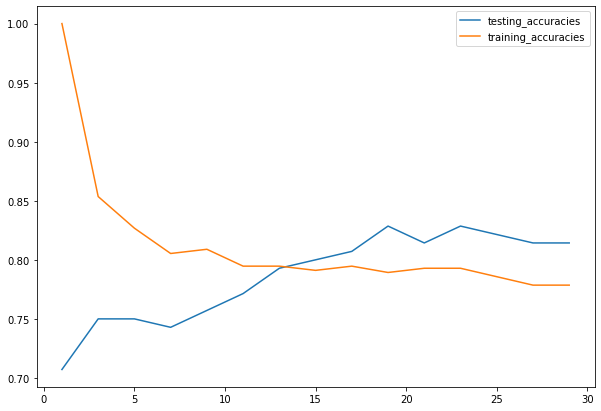

In [31]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, markers=True)
sns.lineplot(k, training_accuracies, markers=True)
plt.legend(['testing_accuracies','training_accuracies'])

In [32]:
print('Best k :', best_k)
print('Best score :', score)

Best k : 19
Best score : 0.8285714285714286


In [9]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_ = KNeighborsClassifier(n_neighbors = i)
    knn_.fit(X_train_scaled_MM, y_train)
    
    y_predict_train = knn_.predict(X_train_scaled_MM)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = knn_.predict(X_test_scaled_MM)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score < acc_score :
        score = acc_score
        best_k = i

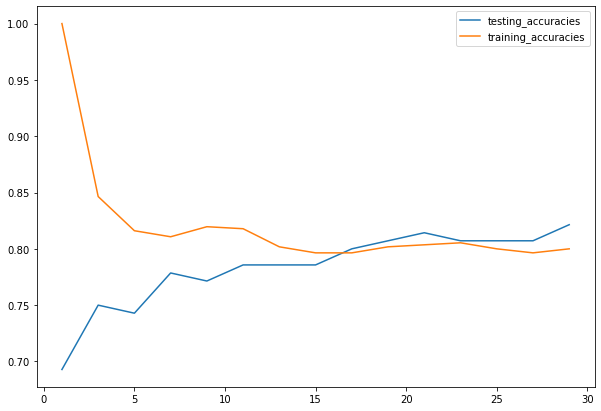

In [10]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, markers=True)
sns.lineplot(k, training_accuracies, markers=True)
plt.legend(['testing_accuracies','training_accuracies'])

In [11]:
print('Best k :', best_k)
print('Best score :', score)

Best k : 29
Best score : 0.8214285714285714


In [12]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_ = KNeighborsClassifier(n_neighbors = i)
    knn_.fit(X_train_scaled_R, y_train)
    
    y_predict_train = knn_.predict(X_train_scaled_R)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = knn_.predict(X_test_scaled_R)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score < acc_score :
        score = acc_score
        best_k = i

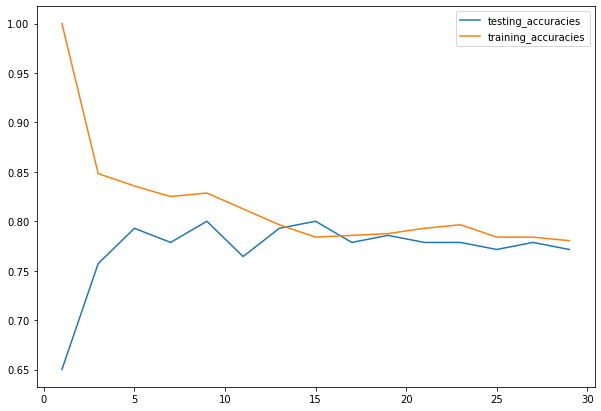

In [13]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, markers=True)
sns.lineplot(k, training_accuracies, markers=True)
plt.legend(['testing_accuracies','training_accuracies'])

In [14]:
print('Best k :', best_k)
print('Best score :', score)

Best k : 9
Best score : 0.8


In [15]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_ = KNeighborsClassifier(n_neighbors = i)
    knn_.fit(X_train_scaled_S, y_train)
    
    y_predict_train = knn_.predict(X_train_scaled_S)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = knn_.predict(X_test_scaled_S)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score < acc_score :
        score = acc_score
        best_k = i

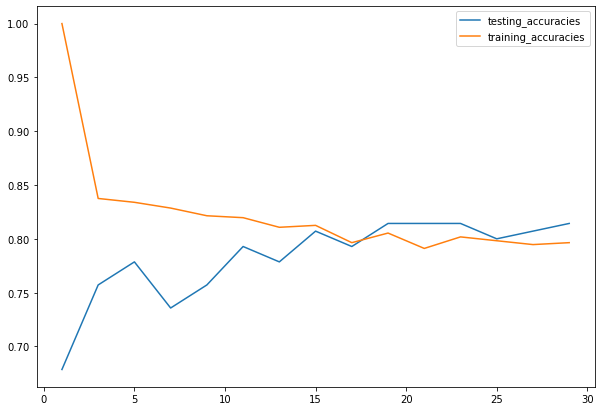

In [16]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, markers=True)
sns.lineplot(k, training_accuracies, markers=True)
plt.legend(['testing_accuracies','training_accuracies'])

In [17]:
print('Best k :', best_k)
print('Best score :', score)

Best k : 19
Best score : 0.8142857142857143


## Finding Best Max-Depth Decision Tree

In [50]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [27]:
k = range(1,26)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    dtc_ = DecisionTreeClassifier(criterion='entropy', max_depth = i, random_state=2021)
    dtc_.fit(X_train, y_train)
    
    y_predict_train = dtc_.predict(X_train)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = dtc_.predict(X_test)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score < acc_score :
        score = acc_score
        best_k = i

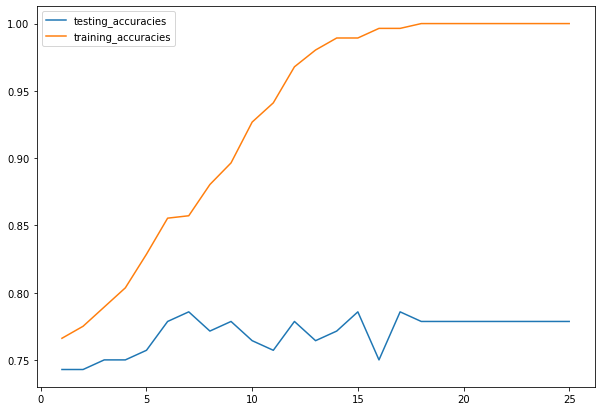

In [28]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, markers=True)
sns.lineplot(k, training_accuracies, markers=True)
plt.legend(['testing_accuracies','training_accuracies'])

In [29]:
print('Best k :', best_k)
print('Best score :', score)

Best k : 7
Best score : 0.7857142857142857


In [18]:
k = range(1,26)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    dtc_ = DecisionTreeClassifier(criterion='entropy', max_depth = i, random_state=2021)
    dtc_.fit(X_train_scaled_MM, y_train)
    
    y_predict_train = dtc_.predict(X_train_scaled_MM)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = dtc_.predict(X_test_scaled_MM)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score < acc_score :
        score = acc_score
        best_k = i

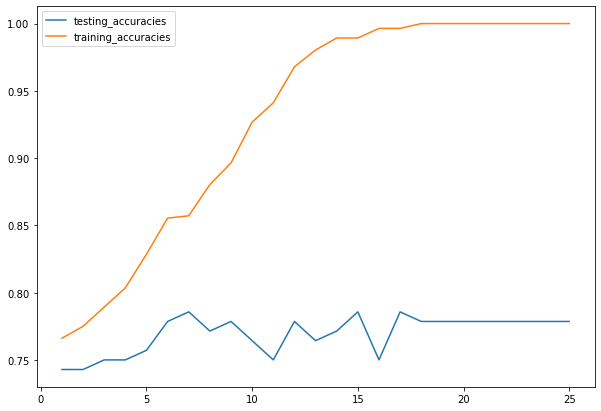

In [19]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, markers=True)
sns.lineplot(k, training_accuracies, markers=True)
plt.legend(['testing_accuracies','training_accuracies'])

In [20]:
print('Best k :', best_k)
print('Best score :', score)

Best k : 7
Best score : 0.7857142857142857


In [21]:
k = range(1,26)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    dtc_ = DecisionTreeClassifier(criterion='entropy', max_depth = i, random_state=2021)
    dtc_.fit(X_train_scaled_R, y_train)
    
    y_predict_train = dtc_.predict(X_train_scaled_R)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = dtc_.predict(X_test_scaled_R)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score < acc_score :
        score = acc_score
        best_k = i

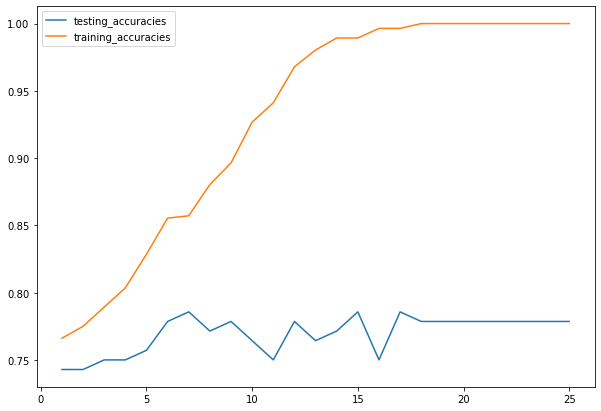

In [22]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, markers=True)
sns.lineplot(k, training_accuracies, markers=True)
plt.legend(['testing_accuracies','training_accuracies'])

In [23]:
print('Best k :', best_k)
print('Best score :', score)

Best k : 7
Best score : 0.7857142857142857


In [24]:
k = range(1,26)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    dtc_ = DecisionTreeClassifier(criterion='entropy', max_depth = i, random_state=2021)
    dtc_.fit(X_train_scaled_S, y_train)
    
    y_predict_train = dtc_.predict(X_train_scaled_S)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = dtc_.predict(X_test_scaled_S)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score < acc_score :
        score = acc_score
        best_k = i

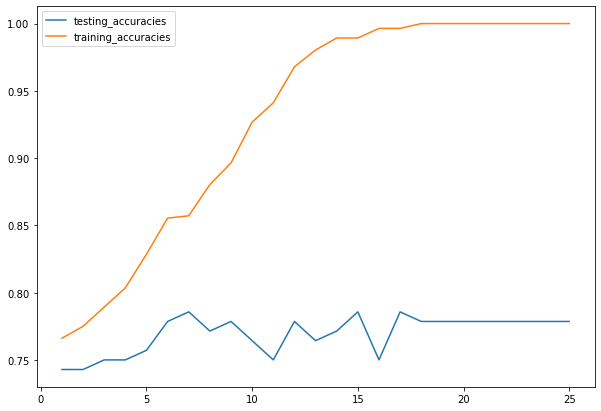

In [25]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, markers=True)
sns.lineplot(k, training_accuracies, markers=True)
plt.legend(['testing_accuracies','training_accuracies'])

In [26]:
print('Best k :', best_k)
print('Best score :', score)

Best k : 7
Best score : 0.7857142857142857


In [33]:
dict(zip(list(range(1,26)),testing_accuracies))

{1: 0.7071428571428572,
 2: 0.75,
 3: 0.75,
 4: 0.7428571428571429,
 5: 0.7571428571428571,
 6: 0.7714285714285715,
 7: 0.7928571428571428,
 8: 0.8,
 9: 0.8071428571428572,
 10: 0.8285714285714286,
 11: 0.8142857142857143,
 12: 0.8285714285714286,
 13: 0.8214285714285714,
 14: 0.8142857142857143,
 15: 0.8142857142857143}

In [34]:
dict(zip(list(range(1,26)),list(zip(training_accuracies, testing_accuracies))))

{1: (1.0, 0.7071428571428572),
 2: (0.8535714285714285, 0.75),
 3: (0.8267857142857142, 0.75),
 4: (0.8053571428571429, 0.7428571428571429),
 5: (0.8089285714285714, 0.7571428571428571),
 6: (0.7946428571428571, 0.7714285714285715),
 7: (0.7946428571428571, 0.7928571428571428),
 8: (0.7910714285714285, 0.8),
 9: (0.7946428571428571, 0.8071428571428572),
 10: (0.7892857142857143, 0.8285714285714286),
 11: (0.7928571428571428, 0.8142857142857143),
 12: (0.7928571428571428, 0.8285714285714286),
 13: (0.7857142857142857, 0.8214285714285714),
 14: (0.7785714285714286, 0.8142857142857143),
 15: (0.7785714285714286, 0.8142857142857143)}

## EXERCISE : Coba 2 parameter tuning yang lain

# Model Complexity - Linear Regression

In [37]:
b = load_boston()
dir(b)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [40]:
print(b['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [45]:
Xi = pd.DataFrame(data=b['data'], columns=b['feature_names'])
Xi.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
yi = pd.Series(b['target'])   #bole array, bole series, kudu 1 dimensi
yi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

## Data Splitting

In [47]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xi, yi, test_size=0.2, random_state=1899)

## Ridge Regression

In [49]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [55]:
alphas = [100000, 10000, 1000, 100, 10, 0.1, 0.01, 0.001]

testing_mse = []
training_mse = []

score = 0

for i in alphas :
    ridge_ = Ridge(alpha=i)
    ridge_.fit(X_train, y_train)
    
    y_predict_train = ridge_.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train))
    
    y_predict_test = ridge_.predict(X_test)
    testing_mse.append(mean_squared_error(y_test, y_predict_test))
    
    mse_score = mean_squared_error(y_test, y_predict_test)
    
    if score > -mse_score :
        score = mse_score
        best_c = i

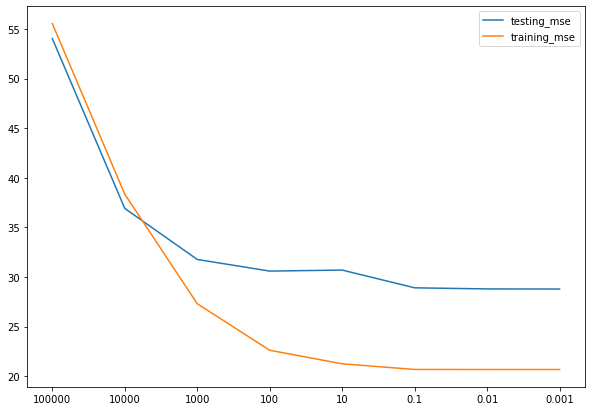

In [61]:
length = range(len(alphas))

plt.figure(figsize=(10,7))
sns.lineplot(length, testing_mse, markers=True)
sns.lineplot(length, training_mse, markers=True)
plt.xticks(length, alphas)
plt.legend(['testing_mse','training_mse'])

In [58]:
print('Best c :', best_c)
print('Best score :', score)

Best c : 0.001
Best score : 28.77840277805296


## How it works?

In [64]:
data = {
    'x' : np.arange(10),
    'y' : np.arange(10)+np.random.randn(10)
}

df = pd.DataFrame(data)
df

,x,y
0,0,-1.154761
1,1,0.761160
2,2,1.026228
3,3,2.666901
4,4,3.836316
5,5,4.974526
6,6,4.550143
7,7,6.312072
8,8,7.590283
9,9,7.105191


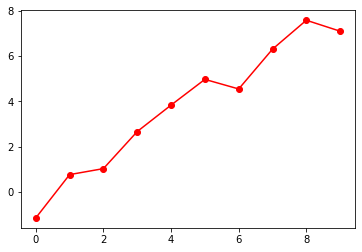

In [66]:
plt.plot(df['x'],df['y'],'ro-')


## 80 : 20 data

In [72]:
Xtr, Xts, ytr, yts = train_test_split(df[['x']], df['y'], test_size=0.2, random_state=1)
lr8020 = LinearRegression()
lr8020.fit(Xtr,ytr)

df['pred_8020'] = lr8020.predict(df[['x']])
df

,x,y,pred_8020
0,0,-1.154761,-0.569916
1,1,0.761160,0.432906
2,2,1.026228,1.435729
3,3,2.666901,2.438552
4,4,3.836316,3.441375
5,5,4.974526,4.444197
6,6,4.550143,5.447020
7,7,6.312072,6.449843
8,8,7.590283,7.452665
9,9,7.105191,8.455488


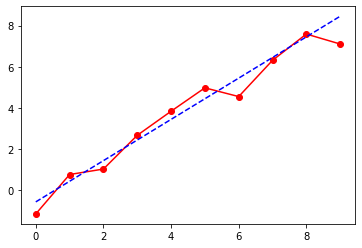

In [74]:
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'], df['pred_8020'], 'b--', label='best fit line OLS')

## 2 Data

In [77]:
lr2 = LinearRegression()
lr2.fit(df[['x']].iloc[:2], df['y'][:2])
df['pred_2'] = lr2.predict(df[['x']])
df

,x,y,pred_8020,pred_2
0,0,-1.154761,-0.569916,-1.154761
1,1,0.761160,0.432906,0.761160
2,2,1.026228,1.435729,2.677081
3,3,2.666901,2.438552,4.593002
4,4,3.836316,3.441375,6.508923
5,5,4.974526,4.444197,8.424844
6,6,4.550143,5.447020,10.340765
7,7,6.312072,6.449843,12.256686
8,8,7.590283,7.452665,14.172606
9,9,7.105191,8.455488,16.088527


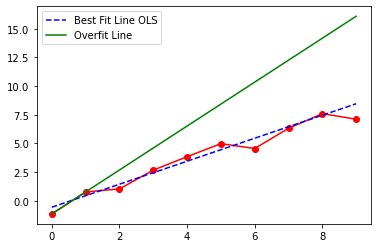

In [78]:
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['pred_8020'], 'b--', label='Best Fit Line OLS')
plt.plot(df['x'], df['pred_2'], 'g-', label='Overfit Line')
plt.legend()
plt.show()

## Ridge 2 data

[0.73689265]


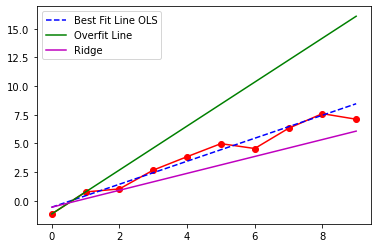

In [79]:
ridge = Ridge(alpha=0.8)
ridge.fit(df[['x']].iloc[:2], df['y'][:2])
df['pred_ridge'] = ridge.predict(df[['x']])
print(ridge.coef_)

plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['pred_8020'], 'b--', label='Best Fit Line OLS')
plt.plot(df['x'], df['pred_2'], 'g-', label='Overfit Line')
plt.plot(df['x'], df['pred_ridge'], 'm-', label='Ridge')
plt.legend()
plt.show()

In [80]:
lr8020.coef_

array([1.00282273])

In [81]:
mse_train_2_ols = mean_squared_error(df['y'][:2], df['pred_2'][:2])
mse_train_2_ridge = mean_squared_error(df['y'][:2], df['pred_ridge'][:2])

print(mse_train_2_ols)
print(mse_train_2_ridge)

2.465190328815662e-32
0.3475269017080572


In [82]:
mse_test_2_ols = mean_squared_error(df['y'][2:], df['pred_2'][2:])
mse_test_2_ridge = mean_squared_error(df['y'][2:], df['pred_ridge'][2:])

print(mse_test_2_ols)
print(mse_test_2_ridge)

27.29746723756878
2.0297553031561106


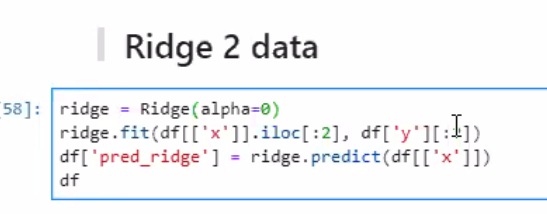

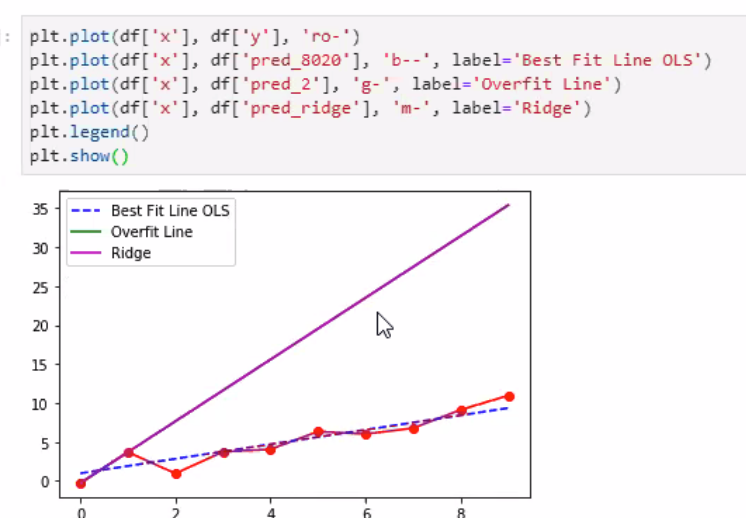

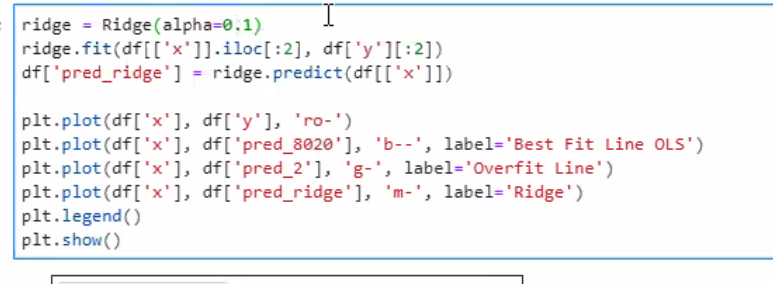

diganti2 alpha nya trus di run coba

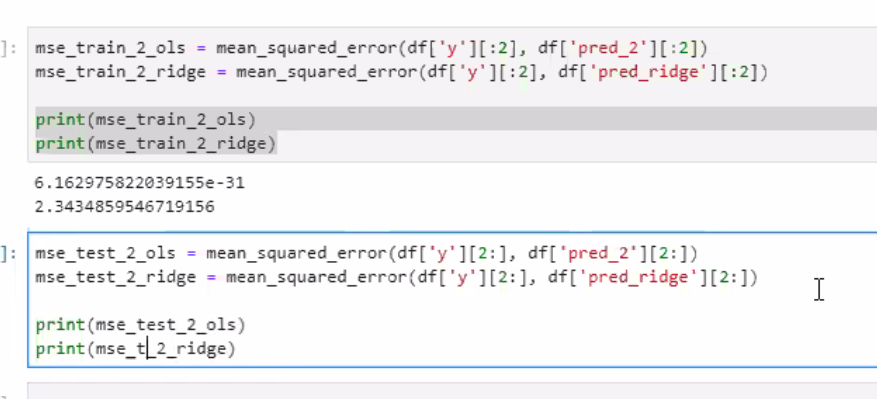